In [3]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jupyterthemes import jtplot
import os
import statsmodels.stats.proportion
jtplot.style(theme='grade3',ticks=True, grid=True, figsize=(12, 7),context='poster',fscale=1.5, spines=True, gridlines='--')
%matplotlib inline

In [4]:
folder='./Data/01/params/'
FilesFold=os.listdir(folder)
#print(FilesFold)

FileList=[os.path.join(folder,file,'allInOne.mat') for file in FilesFold if file.startswith('EtaloningPics')]
FileList.sort()
#FileList

folder1='./Data/03/params/'
FilesFold1=os.listdir(folder1)
#print(FilesFold)

FileList1=[os.path.join(folder1,file,'allInOne.mat') for file in FilesFold1 if file.startswith('EtaloningPics')]
FileList1.sort()
#FileList1

folder2='./Data/04/params/'
FilesFold2=os.listdir(folder2)
#print(FilesFold)

FileList2=[os.path.join(folder2,file,'allInOne.mat') for file in FilesFold2 if file.startswith('EtaloningPics')]
FileList2.sort()
#FileList2

folder3='./Data/02/params/'
FilesFold3=os.listdir(folder3)
#print(FilesFold)

FileList3=[os.path.join(folder3,file,'allInOne.mat') for file in FilesFold3 if file.startswith('EtaloningPics')]
FileList3.sort()
#FileList2

folder5='./Data/05/params/'
FilesFold5=os.listdir(folder5)
#print(FilesFold)

FileList5=[os.path.join(folder5,file,'allInOne.mat') for file in FilesFold5 if file.startswith('EtaloningPics')]
FileList5.sort()
#FileList2

folder6='./Data/06/params/'
FilesFold6=os.listdir(folder6)
#print(FilesFold)

FileList6=[os.path.join(folder6,file,'allInOne.mat') for file in FilesFold6 if file.startswith('EtaloningPics')]
FileList6.sort()
#FileList2

In [4]:
def calcatomlist(FileList):
    numlist=[]
    for File in FileList:
        try:
            matdata=scio.loadmat(File)
            if 1000>len(matdata['FilledAtom1'])>0:
        #if matdata['fnum'][0][0]==2:
        #showatoms(File)
        #plt.pause(0.1)
        #plt.close()
                numlist.append(len(matdata['FilledAtom1']))
        except TypeError:
            pass  
    return np.array(numlist)

def datalist(FileList,keyword):
    numlist=[]
    rightpoints=[0]*11
    for i in range(len(FileList)):
        try:
            matdata=scio.loadmat(FileList[i])
            #if 10000>len(matdata['FilledAtom1'])>0:
        #showatoms(File)
        #plt.pause(0.1)
        #plt.close()
            numlist.append(matdata[keyword])
            rightpoints[i//10]+=1
        except TypeError:
            pass
    return np.array(numlist)

def rawllist(FileList):
    matdata=scio.loadmat(FileList[0])
    numlist=matdata['rawL'][:21]
    numlist=np.array(numlist,'uint64')
    numshape=(np.shape(numlist))[0]
    #print(numshape)
    shapemax=(np.shape(matdata['rawL']))[0]
    for File in FileList[1:]:
        try:
            matdata=scio.loadmat(File)
            rawdata=matdata['rawL']
            rawdata=np.array(rawdata,'uint64')
            if 200>len(matdata['FilledAtom1'])>160:
#                 matshape=(np.shape(matdata['rawL']))[0]
#                 if matshape>shapemax:
#                     shapemax=matshape
#                 if matshape<shapemax:
# #                     print(rawdata.shape())
#                     rawdata=np.vstack((rawdata,np.array([[0,0]]*(shapemax-matshape))))
#                 if numshape<shapemax:
# #                     print(numlist.shape())
#                     numlist=np.vstack((numlist,np.array([[0,0]]*(shapemax-numshape))))
#                     numshape=shapemax
                numlist+=rawdata[:21]
                #print(numlist.transpose())
        except TypeError:
            pass        
    return numlist


def showatoms(File):
    matdata=scio.loadmat(File)
    plt.figure(figsize=((7,7)))
    plt.title('Fig')
    plt.axes().set_aspect('equal', 'box')
    plt.grid(False)
    #plt.axes().set_aspect('equal', 'box')
    plt.axis('off')
    plt.gca().invert_yaxis()
    plt.scatter(matdata['Pos_GridCurr'].transpose()[1],matdata['Pos_GridCurr'].transpose()[0],color=(0.85,0.85,0.85),s=60,zorder=3)
    plt.scatter(matdata['FilledAtom1'].transpose()[1],matdata['FilledAtom1'].transpose()[0],s=60,zorder=3)
    plt.show()

def retfilelist(folder):
    FilesFold=os.listdir(folder)
    #print(FilesFold)

    FileList=[os.path.join(folder,file,'allInOne.mat') for file in FilesFold if file.startswith('EtaloningPics')]
    FileList.sort()
    return FileList

In [6]:
matdata=scio.loadmat(FileList[20])
matdata.keys()
matdata1=scio.loadmat(FileList[1])
matdata1['FillRate1']
#np.hstack((matdata['rawL'],matdata1['rawL']))
plt.plot(matdata['FillRate1'][0],'.-')

In [128]:
print(np.mean(calcatomlist(FileList6)),np.std(calcatomlist(FileList6)))

152.24074074074073 31.97796416352823


(array([ 0.,  1.,  1.,  9.,  8., 15., 16., 14., 10., 17.,  8.,  5.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.,
        160., 170., 180., 190., 200., 210., 220., 230., 240., 250., 260.,
        270., 280., 290., 300.]),
 <a list of 25 Patch objects>)

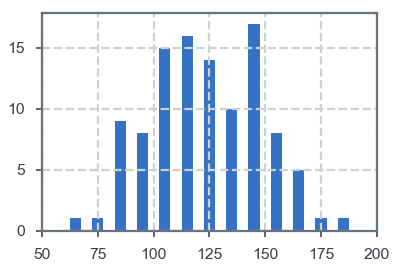

In [129]:
plt.xlim((50,200))
plt.hist(calcatomlist(retfilelist('./Data/08/params/')),bins=np.linspace(50,300,26),rwidth=0.5)

<Container object of 3 artists>

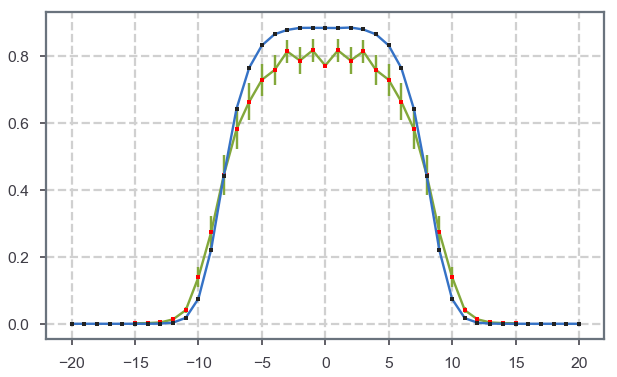

In [559]:
plt.figure(figsize=((10,6)))
fignum=len(np.mean(datalist(FileList,'nBarL')[:,0,:],axis=0))
plt.errorbar(np.arange(fignum),np.mean(datalist(FileList,'nBarL')[:,0,:],axis=0),np.mean(datalist(FileList,'varL')[:,0,:],axis=0)/np.sqrt(fignum),
             marker='s',color='g',mfc='red',mec='red', ms=2, mew=2)
plt.errorbar(-np.arange(fignum),np.mean(datalist(FileList,'nBarL')[:,0,:],axis=0),np.mean(datalist(FileList,'varL')[:,0,:],axis=0)/np.sqrt(fignum),
             marker='s',color='g',mfc='red',mec='red', ms=2, mew=2)

plt.errorbar(np.arange(41)-20,data.iloc[:,1],data.iloc[:,2],marker='s', mec='k',ms=2, mew=2)

In [560]:
np.mean(datalist(FileList,'varL')[:,0,:],axis=0)/np.sqrt(fignum)

array([0.        , 0.03329918, 0.0395321 , 0.0352363 , 0.04418806,
       0.04787958, 0.05469775, 0.05932121, 0.06043279, 0.0487125 ,
       0.02930888, 0.0095073 , 0.00320224, 0.0009732 , 0.00050295,
       0.00037268])

In [7]:
data = pd.read_csv('./Data/01/parity_0.1U.txt', sep="    ", header=None)

/Users/boxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


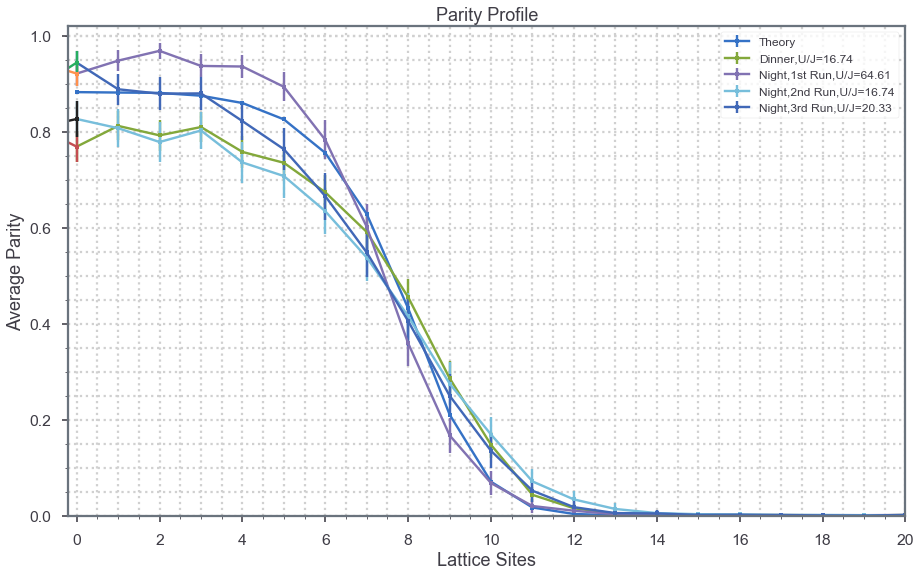

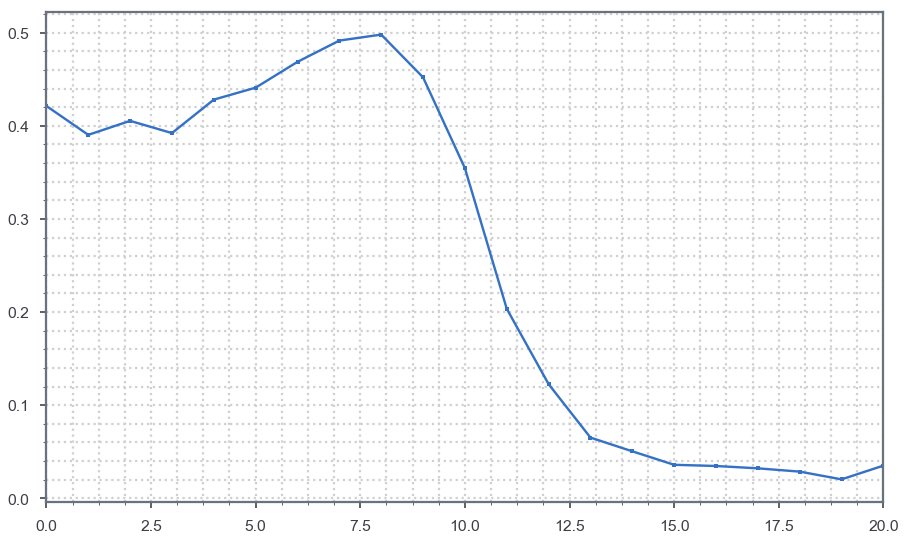

In [313]:
totalfill=rawllist(FileList)
nav=totalfill[:21,1]/(0.001+totalfill[:21,0])
totalfill1=rawllist(FileList1)
nav1=totalfill1[:21,1]/(0.001+totalfill1[:21,0])
totalfill2=rawllist(FileList2)
nav2=totalfill2[:21,1]/(0.001+totalfill2[:21,0])
totalfill3=rawllist(FileList3)
nav3=totalfill3[:21,1]/(0.001+totalfill3[:21,0])

plt.figure(figsize=(15,9))
plt.minorticks_on()
plt.grid(True, which='both',linestyle='dotted')
plt.xlim((-0.20,20))
plt.ylim((0,1.02))
plt.xlabel('Lattice Sites')
plt.ylabel('Average Parity')
plt.xticks(np.linspace(0,20,11))
plt.title('Parity Profile')
plt.errorbar(np.arange(21),data.iloc[20:,1],data.iloc[20:,2],marker='s',ms=2, mew=2,label='Theory')
# plt.plot(np.arange(len(totalfill[:21,1])),nav,'-o',markersize=5,label='Dinner,U/J=16.74')
# confi=statsmodels.stats.proportion.proportion_confint(totalfill[:21,1], totalfill[:21,0], alpha=0.32, method='beta')
# plt.vlines(np.arange(21),confi[0],confi[1],color='g')
plt.errorbar(np.arange(len(totalfill[:21,1])),nav,np.sqrt((nav-nav**2)/len(FileList)),marker='s', ms=2, mew=2,label='Dinner,U/J=16.74')
plt.errorbar(-np.arange(len(totalfill[:21,1])),nav,np.sqrt((nav-nav**2)/len(FileList)),marker='s', ms=2, mew=2)

# plt.plot(np.arange(len(totalfill3[:21,1])),nav3,'-o',markersize=5,label='Night,1st Run,U/J=64.61')
# confi3=statsmodels.stats.proportion.proportion_confint(totalfill3[:21,1], totalfill3[:21,0], alpha=0.32, method='beta')
# plt.vlines(np.arange(21),confi3[0],confi3[1],color='r')
plt.errorbar(np.arange(len(totalfill3[:21,1])),nav3,np.sqrt((nav3-nav3**2)/len(FileList3)),marker='s', ms=2, mew=2,label='Night,1st Run,U/J=64.61')
plt.errorbar(-np.arange(len(totalfill3[:21,1])),nav3,np.sqrt((nav3-nav3**2)/len(FileList3)),marker='s', ms=2, mew=2)


#plt.plot(np.arange(len(totalfill1[:21,1])),nav1,'-o',markersize=5,label='Night,2nd Run,U/J=16.74')
# confi1=statsmodels.stats.proportion.proportion_confint(totalfill1[:21,1], totalfill1[:21,0], alpha=0.32, method='beta')
# plt.vlines(np.arange(21),confi1[0],confi1[1],color='purple')
plt.errorbar(np.arange(len(totalfill1[:21,1])),nav1,np.sqrt((nav1-nav1**2)/len(FileList1)),marker='s', ms=2, mew=2,label='Night,2nd Run,U/J=16.74')
plt.errorbar(-np.arange(len(totalfill1[:21,1])),nav1,np.sqrt((nav1-nav1**2)/len(FileList1)),marker='s', ms=2, mew=2,)


#plt.plot(np.arange(len(totalfill2[:21,1])),nav2,'-o',markersize=5,label='Night,3rd Run,U/J=20.33')
# confi2=statsmodels.stats.proportion.proportion_confint(totalfill2[:21,1], totalfill2[:21,0], alpha=0.32, method='beta')
# plt.vlines(np.arange(21),confi2[0],confi2[1],color='orange')
plt.errorbar(np.arange(len(totalfill2[:21,1])),nav2,np.sqrt((nav2-nav2**2)/len(FileList2)),marker='s', ms=2, mew=2,label='Night,3rd Run,U/J=20.33')
plt.errorbar(-np.arange(len(totalfill2[:21,1])),nav2,np.sqrt((nav2-nav2**2)/len(FileList2)),marker='s', ms=2, mew=2)

plt.legend(loc='best',fontsize=12)
#plt.savefig('Parity Profile.pdf')


plt.figure(figsize=(15,9))
plt.minorticks_on()
plt.grid(True, which='both',linestyle='dotted')
plt.xlim((0,20))
#plt.ylim((0,1.02))
plt.plot(np.arange(len(totalfill[:21,1])),np.sqrt((nav-nav**2)),marker='s', ms=2, mew=2,label='Dinner,U/J=16.74')


<Container object of 3 artists>

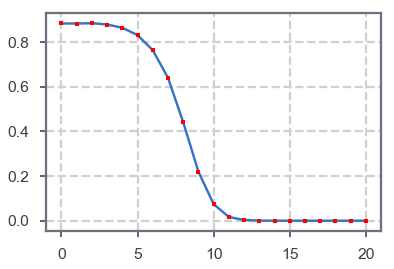

In [461]:
plt.errorbar(np.arange(21),data.iloc[20:,1],data.iloc[20:,2],marker='s',mfc='red',mec='red', ms=2, mew=2)

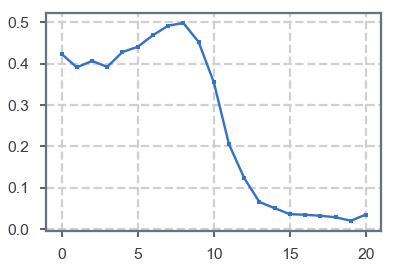

In [738]:
plt.plot(np.arange(len(totalfill[:21,1])),np.sqrt((nav-nav**2)),marker='s', ms=2, mew=2,label='Dinner,U/J=16.74')


In [355]:
data2 = pd.read_csv('./Data/05/parity_0.1U.txt', sep="    ", header=None)
data = pd.read_csv('./Data/05/parity_0.1U.txt', sep="    ", header=None)

/Users/boxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/boxiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


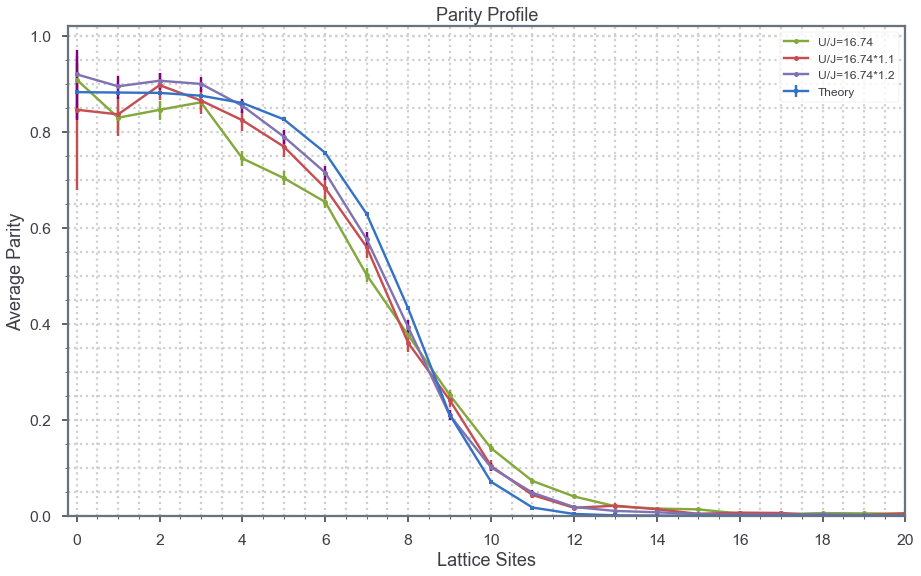

In [186]:
totalfill5=rawllist(FileList5)
nav5=totalfill5[:21,1]/totalfill5[:21,0]
totalfill6=rawllist(FileList6)
nav6=totalfill6[:21,1]/totalfill6[:21,0]
totalfill7=rawllist(retfilelist('./Data/MottInsulator/params/'))
nav7=totalfill7[:21,1]/totalfill7[:21,0]
totalfill8=rawllist(retfilelist('./Data/07/params/'))
nav8=totalfill8[:21,1]/totalfill8[:21,0]


plt.figure(figsize=(15,9))
plt.minorticks_on()
plt.grid(True, which='both',linestyle='dotted')
plt.xlim((-0.2,20))
plt.ylim((0.0,1.02))
plt.xlabel('Lattice Sites')
plt.ylabel('Average Parity')
plt.xticks(np.linspace(0,20,11))
plt.title('Parity Profile')
plt.errorbar(np.arange(21),data2.iloc[20:,1],data2.iloc[20:,2],marker='s',ms=2, mew=2,label='Theory')

plt.plot(np.arange(len(totalfill5[:21,1])),nav5,'-o',markersize=5,label='U/J=16.74')
confi5=statsmodels.stats.proportion.proportion_confint(totalfill5[:21,1], totalfill5[:21,0], alpha=0.32, method='beta')
plt.vlines(np.arange(21),confi5[0],confi5[1],color='g')

plt.plot(np.arange(len(totalfill6[:21,1])),nav6,'-o',markersize=5,label='U/J=16.74*1.1')
confi6=statsmodels.stats.proportion.proportion_confint(totalfill6[:21,1], totalfill6[:21,0], alpha=0.32, method='beta')
plt.vlines(np.arange(21),confi6[0],confi6[1],color='r')

# plt.plot(np.arange(len(totalfill7[:21,1])),nav7,'-o',markersize=5,label='MottInsulator')
# confi7=statsmodels.stats.proportion.proportion_confint(totalfill7[:21,1], totalfill7[:21,0], alpha=0.32, method='beta')
# plt.vlines(np.arange(21),confi7[0],confi7[1],color='purple')

plt.plot(np.arange(len(totalfill7[:21,1])),nav8,'-o',markersize=5,label='U/J=16.74*1.2')
confi8=statsmodels.stats.proportion.proportion_confint(totalfill8[:21,1], totalfill8[:21,0], alpha=0.32, method='beta')
plt.vlines(np.arange(21),confi8[0],confi8[1],color='purple')





plt.legend(loc='best',fontsize=12)
#plt.savefig('ParityProfile2.pdf')

In [173]:
matdata=scio.loadmat(FileList[0])
s=matdata['rawL']
np.array(s,dtype='uint32').transpose()

array([[ 1,  8, 12, 16, 28, 32, 40, 40, 50, 58, 64, 61, 64, 64, 71, 63,
        60, 59, 58, 60, 63, 51, 44, 40, 46, 39, 31, 21, 14, 12,  6,  3,
         3],
       [ 0,  4,  7, 12, 14, 26, 27, 32, 25, 18,  8,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]], dtype=uint32)

xmean=18.12 sites xstd=2.66 sites
ymean=23.31 sites ystd=1.24 sites


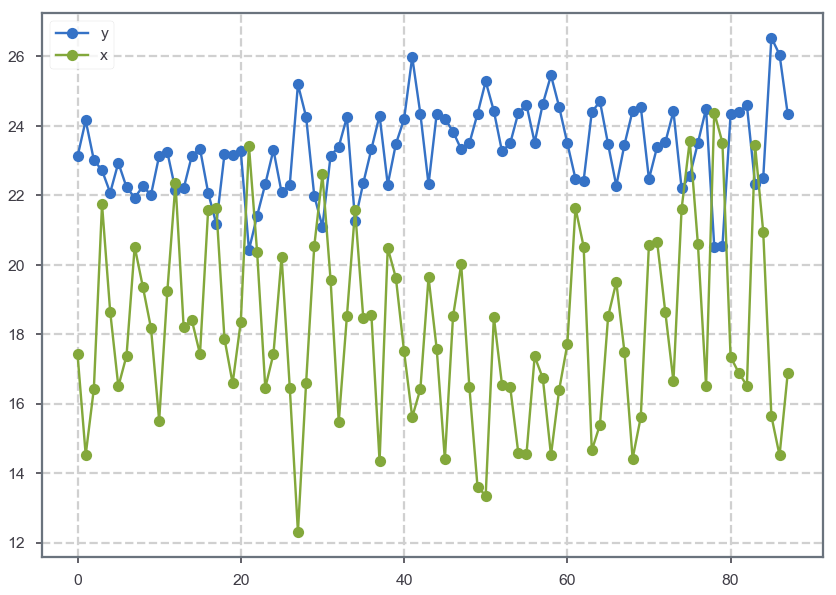

In [159]:
plt.figure(figsize=(14,10))
FileListspc=retfilelist('./Data/04/params/')
plt.plot(datalist(FileListspc,'midPos1').transpose()[0][0]/4.2,'-o',label='y')
plt.plot(datalist(FileListspc,'midPos1').transpose()[1][0]/4.2,'-o',label='x')
plt.legend(loc='best')
print('xmean=%0.2f sites'%(np.mean(datalist(FileListspc,'midPos1').transpose()[1][0])/4.2),'xstd=%0.2f sites'%(np.std(datalist(FileListspc,'midPos1').transpose()[1][0])/4.2))
print('ymean=%0.2f sites'%(np.mean(datalist(FileListspc,'midPos1').transpose()[0][0])/4.2),'ystd=%0.2f sites'%(np.std(datalist(FileListspc,'midPos1').transpose()[0][0])/4.2))

In [141]:
datalist(FileList1,'midPos1').transpose()[1]

array([[ 77.89377852,  77.81768809,  60.88825642,  65.26592393,
         99.2928176 ,  98.78130887,  78.09367294,  70.16643234,
         94.65640628, 111.4610478 ,  68.76786435,  59.36190511,
         69.09116733,  81.75539815,  65.15640628,  56.54814262,
         60.69728867,  82.16164532,  86.52660479,  69.70453585,
         57.08767983,  68.86082286,  77.33334024,  60.46885758,
         56.23714678,  64.69259498,  81.96257426,  73.13335895,
         56.49848824,  73.84133536,  90.51855048,  90.39028743,
         86.01304741,  65.27379046,  86.44771603,  65.68117973,
         60.50118057,  72.9038067 ,  73.52394053,  64.93466925,
         64.68619376,  69.47780007,  86.05602376,  82.77440515,
         56.83857449,  61.49025827,  74.07518855,  78.00872604,
         78.53406879,  65.4339183 ,  73.02960789,  85.70224081,
         65.78822673,  52.27198155,  65.47208127,  64.95515081,
         61.71227783,  57.88029735,  57.81131898,  69.99044971,
         60.74118272,  56.93503909,  73.

In [175]:
nav5

array([0.90909091, 0.82954545, 0.8459596 , 0.86174242, 0.74458874,
       0.70359848, 0.65378788, 0.50151515, 0.37636364, 0.25182863,
       0.140625  , 0.07219251, 0.03998401, 0.01942502, 0.01464809,
       0.01300191, 0.0041511 , 0.00305677, 0.00521966, 0.00453515,
       0.0041686 ])

In [176]:
scio.savemat('data1.mat',{'data1':nav5,'uplim1':confi5[1],'lowlim1':confi5[0],'data2':nav6,'uplim2':confi6[1],'lowlim2':confi6[0],'data3':nav8,'uplim3':confi8[1],'lowlim3':confi8[0]})

In [180]:
print(totalfill5[0][0],totalfill6[0][0],totalfill8[0][0])

33 13 25


In [184]:
print(np.mean(calcatomlist(FileList5)),np.std(calcatomlist(FileList5)))
print(np.mean(calcatomlist(FileList6)),np.std(calcatomlist(FileList6)))
print(np.mean(calcatomlist(retfilelist('./Data/07/params/'))),np.std(calcatomlist(retfilelist('./Data/07/params/'))))

176.96969696969697 11.234375947887612
176.84615384615384 8.337553172208755
179.32 10.118181654823163


In [21]:
print(np.mean(datalist(FileList5,'FillRate1')[:,0,7]),
np.mean(datalist(FileList6,'FillRate1')[:,0,7]),
np.mean(datalist(retfilelist('./Data/07/params/'),'FillRate1')[:,0,7]))

0.8011363636363636 0.8461538461538461 0.879375


In [33]:
np.mean(datalist(retfilelist('./Data/08/params/'),'FillRate1'),axis=0)

array([[0.66666667, 0.83333333, 0.75925926, 0.79166667, 0.77333333,
        0.76388889, 0.77891156, 0.77083333, 0.75102881, 0.72166667,
        0.70523416, 0.68055556, 0.64891519, 0.6122449 , 0.58740741,
        0.54622396, 0.51326413, 0.47067901, 0.43490305, 0.39791667,
        0.3707483 , 0.34090909, 0.3147448 , 0.28935185, 0.26773333,
        0.24778107, 0.23022405, 0.21407313, 0.2030347 , 0.18983013,
        0.18471335, 0.17345893, 0.16987251, 0.1597921 , 0.15906199,
        0.15006056, 0.15006056, 0.14214403, 0.14214403, 0.13675058]])

In [34]:
np.shape(datalist(retfilelist('./Data/08/params/'),'FillRate1'))

(6, 1, 40)

In [6]:
def datalist2(FileList,keyword):
    numlist=[]
    rightpoints=[0]*11
    for i in range(len(FileList)):
        try:
            matdata=scio.loadmat(FileList[i])
            if 3000>len(matdata['FilledAtom1'])>10:
        #showatoms(File)
        #plt.pause(0.1)
        #plt.close()
                f=int(FileList[i].split('--')[1][:3])-1
                numlist.append(matdata[keyword])
                rightpoints[f//10]+=1
        except TypeError:
            pass
    return np.array(numlist),rightpoints

In [529]:
UoverJList=np.linspace(2,50,11)

#UoverJList=[1.8937038,6.42670038,10.96871796,15.50649696,20.07099069,24.61793411,29.15224018,33.6834859,38.22323611,42.75832103,47.30291941]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[0.5680000000000002, 0.6359999999999999, 0.7639999999999999, 0.8600000000000001, 0.908, 0.8520000000000001, 0.8760000000000001, 0.9, 0.932, 0.9480000000000001, 0.9280000000000002]
[0.09086253353280438, 0.05499090833947007, 0.1065082156455548, 0.07848566748139432, 0.08953211714239756, 0.09641576634555159, 0.08089499366462675, 0.059999999999999984, 0.059464274989274, 0.05946427498927401, 0.07547184905645282]


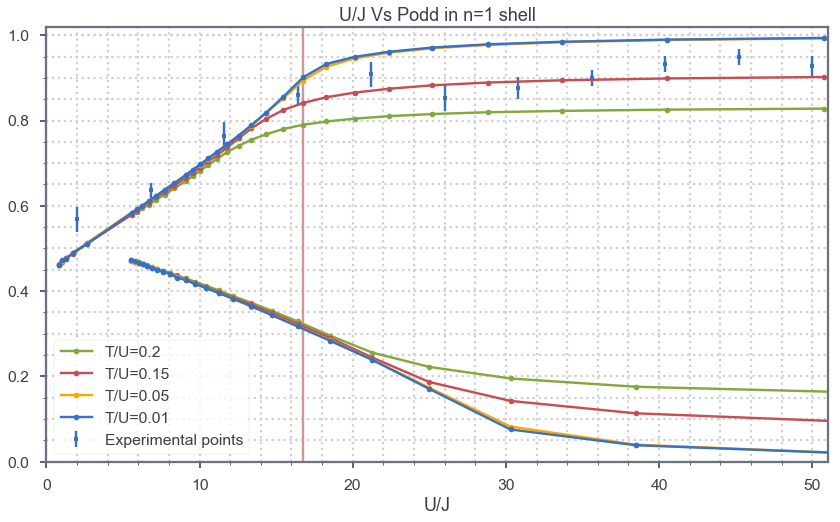

In [541]:
datawant,rightpoints=datalist2(retfilelist('./Data/11/params/'),'FillRate1')
cum=np.cumsum(rightpoints)
print(rightpoints)

meanlist=[np.mean(datawant[:,0,4][:cum[0]])]
stdlist=[np.std(datawant[:,0,4][:cum[0]])]
for i in range(10):
    meanlist.append(np.mean(datawant[:,0,4][cum[i]:cum[i+1]]))
    stdlist.append(np.std(datawant[:,0,4][cum[i]:cum[i+1]]))
    
print(meanlist)
print(stdlist)


with open('./Data/Podd.dat') as f:
    lines=f.readlines()
    linsli=[]
    for line in lines:
        linsli.append(line.split())
        
dfodd=pd.DataFrame(linsli[1:],columns=linsli[0],dtype='float')

#print(dfodd['1/(T/U)'][:4])

plt.figure(figsize=((14,8)))
plt.title('U/J Vs Podd in n=1 shell')
plt.minorticks_on()
plt.grid(True, which='both',linestyle='dotted')
plt.xlim((0,51))
plt.ylim((0,1.02))
plt.xlabel('U/J')

dfodd5=dfodd[dfodd['1/(T/U)']==5.0]
dfodd7=dfodd[dfodd['1/(T/U)']==6.6667]
dfodd20=dfodd[dfodd['1/(T/U)']==20.0]
dfodd100=dfodd[dfodd['1/(T/U)']==100.0]

l1,=plt.plot(1/dfodd5['J/U'],dfodd5['podd'],'g.-',label='T/U=0.2')
l2,=plt.plot(1/dfodd7['J/U'],dfodd7['podd'],'r.-',label='T/U=0.15')
l3,=plt.plot(1/dfodd20['J/U'],dfodd20['podd'],'.-',color='orange',label='T/U=0.05')
l4,=plt.plot(1/dfodd100['J/U'],dfodd100['podd'],'b.-',label='T/U=0.01')

with open('./Data/Peven.dat') as f:
    lines=f.readlines()
    linsli=[]
    for line in lines:
        linsli.append(line.split())
        
dfeven=pd.DataFrame(linsli[1:],columns=linsli[0],dtype='float')

#plt.figure(figsize=((14,8)))

dfeven5=dfeven[dfeven['1/(T/U)']==5.0]
dfeven7=dfeven[dfeven['1/(T/U)']==6.6667]
dfeven20=dfeven[dfeven['1/(T/U)']==20.0]
dfeven100=dfeven[dfeven['1/(T/U)']==100.0]

plt.plot(1/dfeven5['J/U'],dfeven5['podd'],'g.-')
plt.plot(1/dfeven7['J/U'],dfeven7['podd'],'r.-')
plt.plot(1/dfeven20['J/U'],dfeven20['podd'],'.-',color='orange')
plt.plot(1/dfeven100['J/U'],dfeven100['podd'],'b.-')
plt.vlines(16.74,-10,10,colors=[0.8,0.6,0.6])
l5=plt.errorbar(UoverJList,meanlist,stdlist/np.sqrt(10),marker='s',ms=2, mew=2,ls='None',label='Experimental points')

plt.legend(handles=[l1,l2,l3,l4,l5],loc='best')
#plt.savefig('UJvsPoddinn=1shell20180530.pdf',dpi=500)

In [148]:
rightpoints

[8, 10, 9, 10, 10, 10, 10, 9, 10, 10, 10]

xmean=22.55 sites xstd=1.99 sites
ymean=18.56 sites ystd=1.00 sites


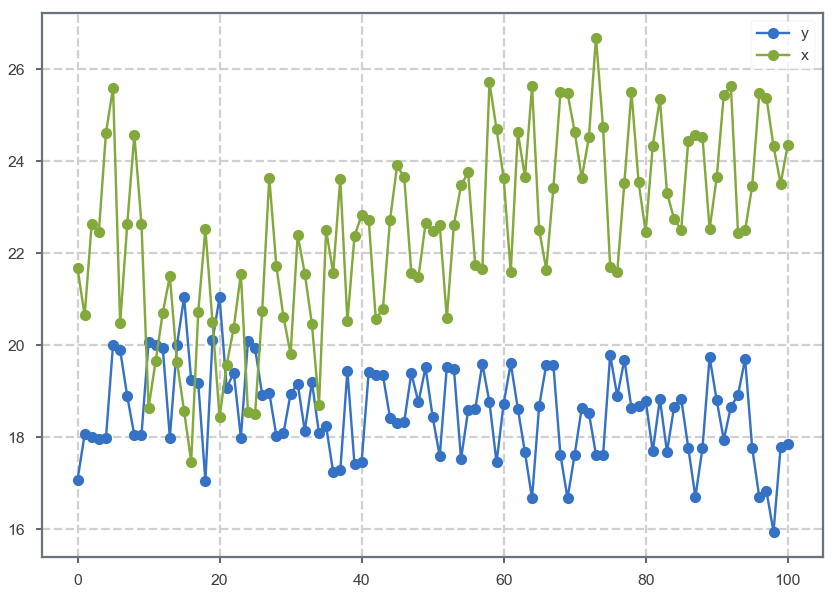

In [297]:
plt.figure(figsize=(14,10))
FileListspc=retfilelist('./Data/11/params/')
plt.plot(datalist(FileListspc,'midPos1').transpose()[0][0]/4.2,'-o',label='y')
plt.plot(datalist(FileListspc,'midPos1').transpose()[1][0]/4.2,'-o',label='x')
plt.legend(loc='best')
print('xmean=%0.2f sites'%(np.mean(datalist(FileListspc,'midPos1').transpose()[1][0])/4.2),'xstd=%0.2f sites'%(np.std(datalist(FileListspc,'midPos1').transpose()[1][0])/4.2))
print('ymean=%0.2f sites'%(np.mean(datalist(FileListspc,'midPos1').transpose()[0][0])/4.2),'ystd=%0.2f sites'%(np.std(datalist(FileListspc,'midPos1').transpose()[0][0])/4.2))

In [427]:
datawant,rightpoints=datalist2(retfilelist('./Data/11/params/'),'FillRate1')
cum=np.cumsum(rightpoints)

meanlist=[np.mean(datawant[:,0,6][:cum[0]])]
stdlist=[np.std(datawant[:,0,6][:cum[0]])]
for i in range(10):
    meanlist.append(np.mean(datawant[:,0,6][cum[i]:cum[i+1]]))
    stdlist.append(np.std(datawant[:,0,6][cum[i]:cum[i+1]]))
    
print(meanlist)
print(stdlist)

[0.5877551020408164, 0.6428571428571429, 0.7551020408163265, 0.8428571428571429, 0.9040816326530614, 0.8571428571428571, 0.8693877551020408, 0.9102040816326532, 0.9224489795918366, 0.9204081632653061, 0.9163265306122449]
[0.07787258787077106, 0.054187420601435714, 0.06890588986177197, 0.06647549989756055, 0.06521038901498147, 0.08414501276770736, 0.06902667153178679, 0.03893629393538554, 0.059709138115623644, 0.061529850741556466, 0.07980087671843734]


In [350]:
rightpoints

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

# 20180531 Theory Data

In [6]:
with open('./Data/20180531/Theory/sim_task.txt') as f:
    ui=[]
    for line in f.readlines()[4:25]:
        ui.append(line.split())
    
theorydata=pd.DataFrame(ui[1:],columns=ui[0],dtype='float')
theorydata

,U/J,J,omega
0,1.000000,1.000000,0.033720
1,3.578947,0.279412,0.021931
2,6.157895,0.162393,0.019458
3,8.736842,0.114458,0.018285
4,11.315789,0.088372,0.017573
5,13.894737,0.071970,0.017084
6,16.473684,0.060703,0.016723
7,19.052632,0.052486,0.016441
8,21.631579,0.046229,0.016215
9,24.210526,0.041304,0.016027


In [7]:
columns=['L', '1/T', 'J', 'mu', 'podd', 'error']

with open('./Data/20180531/Theory/results/job1/L41-P180.txt') as f:
    ui1=[]
    for line in f.readlines():
        #print(line)
        if line.split()[1:]!=columns:
            ui1.append(line.split())

job1=pd.DataFrame(ui1[:],columns=columns,dtype='float')

def jobT(revT):
    return job1[job1['1/T']==revT]

pd.unique(job1['1/T'])
print(ui1[0][1:])

['20.000000', '0.279412', '-0.328125', '0.507795', '0.000158']


In [8]:
datawant,rightpoints=datalist2(retfilelist('./Data/11/params/'),'FillRate1')
cum=np.cumsum(rightpoints)
print(rightpoints)

meanlist=[np.mean(datawant[:,0,8][:cum[0]])]
stdlist=[np.std(datawant[:,0,8][:cum[0]])]
for i in range(10):
    meanlist.append(np.mean(datawant[:,0,8][cum[i]:cum[i+1]]))
    stdlist.append(np.std(datawant[:,0,8][cum[i]:cum[i+1]]))
    
print(meanlist)
print(stdlist)


plt.figure(figsize=((14,8)))
plt.title('U/J Vs Podd in n=1 shell')
plt.xlabel('U/J')
plt.xlim((0,51))
plt.ylim((0.41,1.01))
plt.minorticks_on()
plt.grid(True, which='both',linestyle='dotted')

plt.errorbar(theorydata['U/J'][1:],jobT(20.00)['podd'],jobT(20.00)['error'],marker='s',ms=2, mew=2,label='T/U=0.05')
plt.errorbar(theorydata['U/J'][1:],jobT(10.00)['podd'],jobT(10.00)['error'],marker='s',ms=2, mew=2,label='T/U=0.1')
plt.errorbar(theorydata['U/J'][1:],jobT(6.6667)['podd'],jobT(6.6667)['error'],marker='s',ms=2, mew=2,label='T/U=0.15')
plt.errorbar(theorydata['U/J'][1:],jobT(5)['podd'],jobT(5)['error'],marker='s',ms=2, mew=2,label='T/U=0.2')
plt.errorbar(UoverJList,meanlist,stdlist/np.sqrt(rightpoints),marker='s',ms=2, mew=2,ls='None',label='Experimental points')

#plt.errorbar(UoverJList,meanlist,stdlist/np.sqrt(24),marker='s',ms=2, mew=2,ls='None',label='Experimental points')

plt.vlines(16.74,-10,10,colors=[0.48,0.64,0.69],linestyle='dashed')
plt.legend(loc='best')

NameError: name 'datalist2' is not defined

In [436]:
rightpoints

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [604]:
def datalist3(FileList,keyword):
    numlist=[]
    #print(np.shape(numlist))
    rightpoints=[0]*11
    for i in range(len(FileList)):
        try:
            matdata=scio.loadmat(FileList[i])
            if 3000>len(matdata['FilledAtom1'])>10:
        #showatoms(File)
        #plt.pause(0.1)
        #plt.close()
                f=int(FileList[i].split('--')[1][:3])-1
                #print(f%11)
                numlist.append(matdata[keyword][0])
                #print(numlist[0])
                #print(len(numlist[0]))
                #print(np.shape(matdata[keyword][0]))
                #print(f%11)
                rightpoints[f%11]+=1
        except TypeError:
            pass
    return np.array(numlist),rightpoints

datawant,rightpoints=datalist3(retfilelist('./Data/12/params/'),'FillRate1')
cum=np.cumsum(rightpoints)

In [595]:
meanlist=[np.mean(datawant[::11][:,9])]
stdlist=[np.std(datawant[::11][:,9])]
for i in range(10):
    meanlist.append(np.mean(datawant[i+1::11][:,9]))
    stdlist.append(np.mean(datawant[i+1::11][:,9]))
    
print(meanlist)
print(stdlist)

[0.6152, 0.696, 0.7676000000000001, 0.8376, 0.8608, 0.8876000000000001, 0.916, 0.9196, 0.9036000000000002, 0.9283999999999999, 0.9096000000000001]
[0.06870924246416926, 0.696, 0.7676000000000001, 0.8376, 0.8608, 0.8876000000000001, 0.916, 0.9196, 0.9036000000000002, 0.9283999999999999, 0.9096000000000001]


(array([ 1.,  0.,  3., 40., 72., 57., 53., 20., 22.,  7.]),
 array([ 64.,  90., 116., 142., 168., 194., 220., 246., 272., 298., 324.]),
 <a list of 10 Patch objects>)

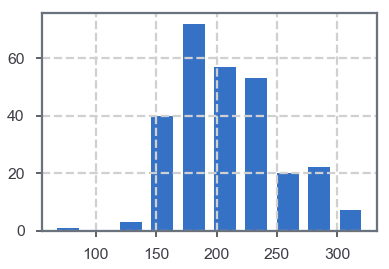

In [596]:
hu=calcatomlist(retfilelist('./Data/12/params/'))
plt.hist(hu,rwidth=0.7)

[0.6251851851851851, 0.7101234567901235, 0.7767901234567902, 0.8414814814814815, 0.8730864197530864, 0.9032098765432098, 0.9219753086419753, 0.9323456790123457, 0.902716049382716, 0.9328395061728395, 0.914567901234568]
[0.07034914126393933, 0.062183017239297554, 0.054424144475638724, 0.0514007419689452, 0.06063425374092178, 0.05528659172447203, 0.043714164891517485, 0.043067844168721274, 0.05751761623548023, 0.04263533371683827, 0.05672782412157779]


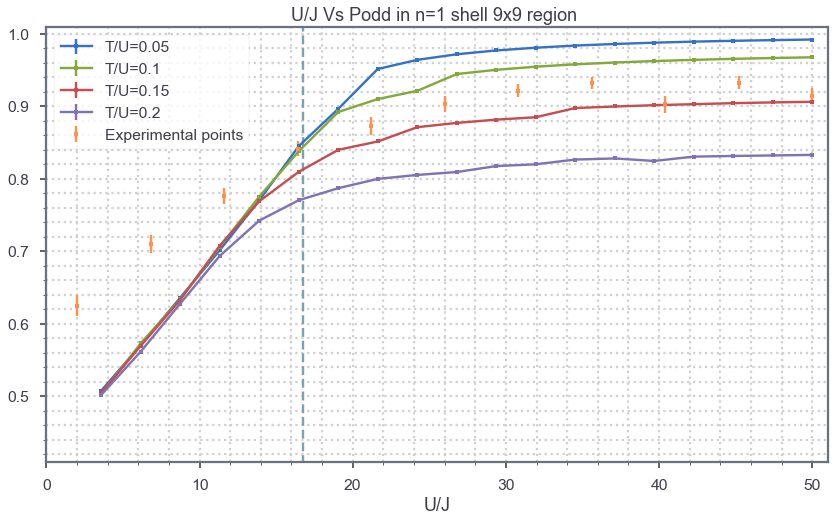

In [605]:
def datalist3(FileList,keyword):
    numlist=[]
    #print(np.shape(numlist))
    rightpoints=[0]*11
    for i in range(len(FileList)):
        try:
            matdata=scio.loadmat(FileList[i])
            if 3000>len(matdata['FilledAtom1'])>10:
        #showatoms(File)
        #plt.pause(0.1)
        #plt.close()
                f=int(FileList[i].split('--')[1][:3])-1
                #print(f%11)
                numlist.append(matdata[keyword][0])
                #print(numlist[0])
                #print(len(numlist[0]))
                #print(np.shape(matdata[keyword][0]))
                #print(f%11)
                rightpoints[f%11]+=1
        except TypeError:
            pass
    return np.array(numlist),rightpoints

datawant,rightpoints=datalist3(retfilelist('./Data/12/params/'),'FillRate1')
# print(rightpoints)
# print(np.shape(datawant))
# print(datawant)
cum=np.cumsum(rightpoints)

meanlist=[np.mean(datawant[::11][:,8])]
stdlist=[np.std(datawant[::11][:,8])]
for i in range(10):
    meanlist.append(np.mean(datawant[i+1::11][:,8]))
    stdlist.append(np.std(datawant[i+1::11][:,8]))
    
print(meanlist)
print(stdlist)


plt.figure(figsize=((14,8)))
plt.title('U/J Vs Podd in n=1 shell 9x9 region ')
plt.xlabel('U/J')
plt.xlim((0,51))
plt.ylim((0.41,1.01))
plt.minorticks_on()
plt.grid(True, which='both',linestyle='dotted')

plt.errorbar(theorydata['U/J'][1:],jobT(20.00)['podd'],jobT(20.00)['error'],marker='s',ms=2, mew=2,label='T/U=0.05')
plt.errorbar(theorydata['U/J'][1:],jobT(10.00)['podd'],jobT(10.00)['error'],marker='s',ms=2, mew=2,label='T/U=0.1')
plt.errorbar(theorydata['U/J'][1:],jobT(6.6667)['podd'],jobT(6.6667)['error'],marker='s',ms=2, mew=2,label='T/U=0.15')
plt.errorbar(theorydata['U/J'][1:],jobT(5)['podd'],jobT(5)['error'],marker='s',ms=2, mew=2,label='T/U=0.2')
plt.errorbar(UoverJList,meanlist,stdlist/np.sqrt(rightpoints),marker='s',ms=2, mew=2,ls='None',label='Experimental points')

#plt.errorbar(UoverJList,meanlist,stdlist/np.sqrt(24),marker='s',ms=2, mew=2,ls='None',label='Experimental points')

plt.vlines(16.74,-10,10,colors=[0.48,0.64,0.69],linestyle='dashed')
plt.legend(loc='best')
#plt.savefig('UJvsPoddinn=1shell20180531.pdf',dpi=500)

# 20180823 数据处理

In [3]:
with open('./Data/20180531/Theory/sim_task.txt') as f:
    ui=[]
    for line in f.readlines()[4:25]:
        ui.append(line.split())
    
theorydata=pd.DataFrame(ui[1:],columns=ui[0],dtype='float')
theorydata

,U/J,J,omega
0,1.000000,1.000000,0.033720
1,3.578947,0.279412,0.021931
2,6.157895,0.162393,0.019458
3,8.736842,0.114458,0.018285
4,11.315789,0.088372,0.017573
5,13.894737,0.071970,0.017084
6,16.473684,0.060703,0.016723
7,19.052632,0.052486,0.016441
8,21.631579,0.046229,0.016215
9,24.210526,0.041304,0.016027


In [9]:
columns=['L', '1/T', 'J', 'mu', 'podd', 'error']

with open('./Data/20180531/Theory/results/job1/L41-P180.txt') as f:
    ui1=[]
    for line in f.readlines():
        #print(line)
        if line.split()[1:]!=columns:
            ui1.append(line.split())

job1=pd.DataFrame(ui1[:],columns=columns,dtype='float')

def jobT(revT):
    return job1[job1['1/T']==revT]

pd.unique(job1['1/T'])
print(ui1[0][1:])

['20.000000', '0.279412', '-0.328125', '0.507795', '0.000158']


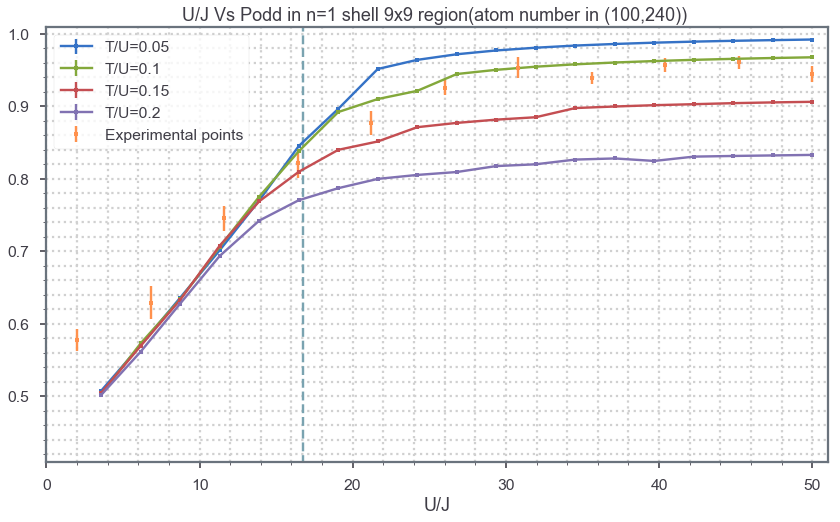

In [24]:
def datalist3(FileList,keyword):
    numlist=[[], [], [], [], [], [], [], [], [], [], []]
    #print(np.shape(numlist))
    rightpoints=[0]*11
    for i in range(len(FileList)):
        try:
            matdata=scio.loadmat(FileList[i])
            if 240>len(matdata['FilledAtom1'])>100:
        #showatoms(File)
        #plt.pause(0.1)
        #plt.close()
                f=int(FileList[i].split('--')[1][:3])-2
                #print(f%11)
                #print(matdata[keyword][0])
                numlist[f%11].append((matdata[keyword][0]/0.985))
                #print(numlist[0])
                #print(len(numlist[0]))
                #print(np.shape(matdata[keyword][0]))
                #print(f%11)
                rightpoints[f%11]+=1
        except TypeError:
            pass
    return np.array(numlist),rightpoints

datawant,rightpoints=datalist3(retfilelist('./Data/13/params/'),'FillRate1')
# print(rightpoints)
# print(np.shape(datawant))
#print(datawant[0])
cum=np.cumsum(rightpoints)
UoverJList=np.linspace(2,50,11)
#print(np.array(datawant[0])[:,2])

site=8
meanlist=[np.mean(np.array(datawant[0])[:,site])]
stdlist=[np.std(np.array(datawant[0])[:,site])]
for i in range(10):
    tmp=np.mean(np.array(datawant[i+1])[:,site])
    meanlist.append(tmp)
    tmp2=np.std(np.array(datawant[i+1])[:,site])
    stdlist.append(tmp2)

# meanlist=[np.mean(datawant[0])]
# stdlist=[np.std(datawant[0])]
# for i in range(10):
#     tmp=np.mean(datawant[i+1])
#     meanlist.append(tmp)
#     tmp2=np.std(datawant[i+1])
#     stdlist.append(tmp2)
    
#print(meanlist)
#print(stdlist)


plt.figure(figsize=((14,8)))
plt.title('U/J Vs Podd in n=1 shell 9x9 region(atom number in (100,240)) ')
plt.xlabel('U/J')
plt.xlim((0,51))
plt.ylim((0.41,1.01))
plt.minorticks_on()
plt.grid(True, which='both',linestyle='dotted')

plt.errorbar(theorydata['U/J'][1:],jobT(20.00)['podd'],jobT(20.00)['error'],marker='s',ms=2, mew=2,label='T/U=0.05')
plt.errorbar(theorydata['U/J'][1:],jobT(10.00)['podd'],jobT(10.00)['error'],marker='s',ms=2, mew=2,label='T/U=0.1')
plt.errorbar(theorydata['U/J'][1:],jobT(6.6667)['podd'],jobT(6.6667)['error'],marker='s',ms=2, mew=2,label='T/U=0.15')
plt.errorbar(theorydata['U/J'][1:],jobT(5)['podd'],jobT(5)['error'],marker='s',ms=2, mew=2,label='T/U=0.2')
plt.errorbar(UoverJList,meanlist,stdlist/np.sqrt(rightpoints),marker='s',ms=2, mew=2,ls='None',label='Experimental points')

#plt.errorbar(UoverJList,meanlist,stdlist/np.sqrt(24),marker='s',ms=2, mew=2,ls='None',label='Experimental points')

plt.vlines(16.74,-10,10,colors=[0.48,0.64,0.69],linestyle='dashed')
plt.legend(loc='best')
plt.savefig('UJvsPoddinn=1shell20180823.pdf',dpi=500)

(array([ 3.,  6., 28., 56., 55., 34., 20.,  8.,  5.,  4.]),
 array([ 17. ,  41.9,  66.8,  91.7, 116.6, 141.5, 166.4, 191.3, 216.2,
        241.1, 266. ]),
 <a list of 10 Patch objects>)

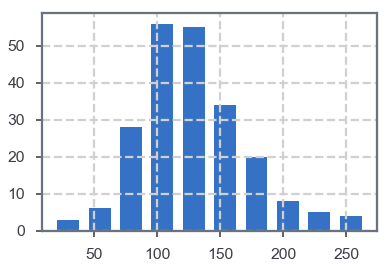

In [127]:
hu=calcatomlist(retfilelist('./Data/13/params/'))
plt.hist(hu,rwidth=0.7)